<a href="https://colab.research.google.com/github/mitchell-jones/DS-Incubator-2020/blob/Kyle-%2F-Test/Machine%20Learning/Exploratory%20Analysis/ColabTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginning Exploratory Analysis - File Handling

In [67]:
# Import Packages
# Handling Data
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import missingno
from datetime import datetime

In [68]:
# Read movie data to dataframe
movies = pd.read_csv('movies.csv')

# Initial Statistics

In [69]:
movies.head()

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,budget,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81.0,373554033.0,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.946943,7.7,5415.0,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,NaN,104.0,262797249.0,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.015539,6.9,2413.0,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101.0,0.0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.712900,6.5,92.0,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,NaN,127.0,81452156.0,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.859495,6.1,34.0,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106.0,76578911.0,0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.387519,5.7,173.0,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [70]:
# Interesting problem w/ genres
# There's multiple features in one column (separated by commas)
# I wonder how many unique features we would have if we seperated them
# into a list
# Same thing with Cast

movies.describe()

,id,runtime,revenue,budget,popularity,average_vote,num_votes
count,46628.000000,46360.000000,4.662400e+04,4.662800e+04,46624.000000,46624.000000,46624.000000
mean,109678.820837,94.086885,1.102765e+07,4.163636e+06,2.894411,5.611728,108.169719
std,112908.126984,38.454015,6.380526e+07,1.727426e+07,5.950483,1.932157,486.429314
min,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,26760.250000,85.000000,0.000000e+00,0.000000e+00,0.382721,5.000000,3.000000
50%,61299.000000,95.000000,0.000000e+00,0.000000e+00,1.115187,6.000000,10.000000
75%,159624.000000,107.000000,0.000000e+00,0.000000e+00,3.610563,6.800000,34.000000
max,469172.000000,1256.000000,2.787965e+09,3.800000e+08,547.488298,10.000000,14075.000000


In [71]:
movies.describe(include='all')

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,budget,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
count,46628.000000,46624,20783,45633,44104,31739,46540,4574,46360.000000,4.662400e+04,4.662800e+04,45711,44137,34346,40132,46624.000000,46624.000000,46624.000000,46617,46611,46229
unique,NaN,42276,20283,44305,4065,25988,17333,1695,NaN,NaN,NaN,17572,42677,22670,2389,NaN,NaN,NaN,89,45415,45020
top,NaN,Blackout,Which one is the first to return - memory or t...,No overview found.,drama,woman director,2008-01-01,Pokémon Collection,NaN,NaN,NaN,John Ford,"Petteri Summanen, Ismo Kallio, Eppu Salminen, ...",Metro-Goldwyn-Mayer (MGM),United States of America,NaN,NaN,NaN,en,tt1180333,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg
freq,NaN,31,27,136,5148,1329,138,34,NaN,NaN,NaN,67,27,746,18126,NaN,NaN,NaN,32937,27,27
mean,109678.820837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.086885,1.102765e+07,4.163636e+06,NaN,NaN,NaN,NaN,2.894411,5.611728,108.169719,NaN,NaN,NaN
std,112908.126984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.454015,6.380526e+07,1.727426e+07,NaN,NaN,NaN,NaN,5.950483,1.932157,486.429314,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,26760.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.382721,5.000000,3.000000,NaN,NaN,NaN
50%,61299.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,1.115187,6.000000,10.000000,NaN,NaN,NaN
75%,159624.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,3.610563,6.800000,34.000000,NaN,NaN,NaN


In [72]:
# I suspect no description != Null
# Instead no description = "No overview found."
movies.shape

(46628, 21)

In [73]:
# 46628 rows, 21 columns

# Nulls per column
movies.isnull().sum()

id                          0
title                       4
tagline                 25845
description               995
genres                   2524
keywords                14889
date                       88
collection              42054
runtime                   268
revenue                     4
budget                      0
director                  917
cast                     2491
production_companies    12282
production_countries     6496
popularity                  4
average_vote                4
num_votes                   4
language                   11
imdb_id                    17
poster_url                399
dtype: int64

In [74]:
# Most movies do not belong to a collection, and many missing tagline/keywords
# Very few movies are missing popularity / voting statistics

# Zeroes per column
for col in movies.columns:
  zero_num = movies[movies[col] == 0].shape[0]
  print(col, zero_num)

id 0
title 0
tagline 0
description 0
genres 0
keywords 0
date 0
collection 0
runtime 1627
revenue 39087
budget 37575
director 0
cast 0
production_companies 0
production_countries 0
popularity 67
average_vote 3121
num_votes 3021
language 0
imdb_id 0
poster_url 0


In [75]:
# Lots of zeroes in Revenue & Budget
# Is this due to data entry, or did these movies really have no revenue/budget?

# Could add Proft col (Revenue - Budget)
# Wouldn't be useful for predicting either of those things due to contamination
movies['profit'] = movies['revenue'] - movies['budget']

# Quick Visualizations

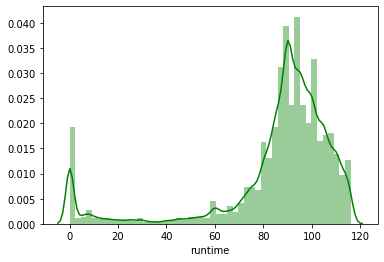

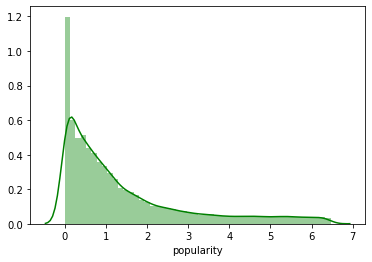

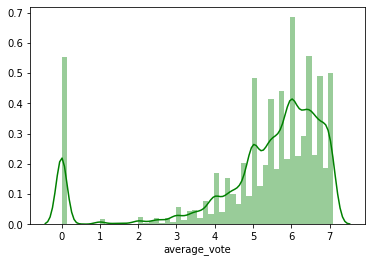

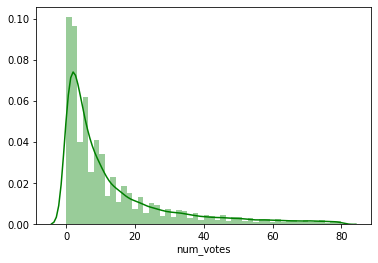

In [76]:
# Distribution Plots for some of the numerical features
# slightly normalized to remove extremely high outliers
# source: https://nextjournal.com/schmudde/how-to-remove-outliers-in-data


distplots = ['runtime','popularity','average_vote','num_votes']
for col in distplots:
  x = movies[col]
  data = x[x.between(x.quantile(.00), x.quantile(.85))]
  sns.distplot(data, color = 'g')
  # can't get plt.title() to work for some reason
  plt.show()

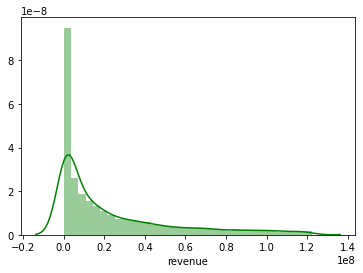

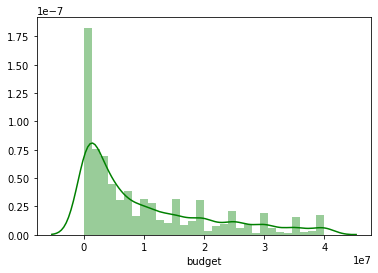

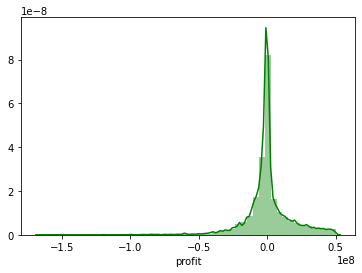

In [77]:
# Graphs for profit, revenue, and budget are messed up because of the zeroes
distplots = ['revenue', 'budget', 'profit']
for col in distplots:
  x = movies[col]
  # remove zeroes
  x = x[x != 0]
  data = x[x.between(x.quantile(.00), x.quantile(.85))]
  sns.distplot(data, color = 'g')
  plt.show()

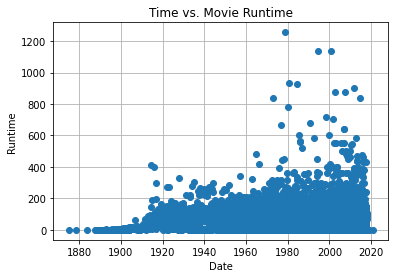

In [82]:
#how has runtime changed over time

y = movies['runtime'] #46628
x = pd.to_datetime(movies['date']) #46628

plt.plot_date(pd.to_datetime(movies['date']),movies['runtime'])
plt.title('Time vs. Movie Runtime')
plt.grid(True)
plt.xlabel("Date")
plt.ylabel('Runtime')
plt.show()